In [2]:
import pandas as pd
import os
import librosa

In [3]:
Tess='D:\\Harsh\\Coding\\BTP_MGC\\MusicGenreClassificationUsingANN\\DATASET\\genres_original'

In [4]:
tess_directory_list = os.listdir(Tess)
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '\\' + dir)
    print(directories)
    for file in directories:
        parts = file.split('.')[0]
        print(parts)
        
        file_emotion.append(parts)
        file_path.append(Tess + '\\' + dir + '\\' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['label'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

['blues.000001.wav', 'blues.000002.wav', 'blues.000003.wav', 'blues.000011.wav', 'blues.000012.wav', 'blues.000013.wav', 'blues.000021.wav', 'blues.000022.wav', 'blues.000023.wav', 'blues.000031.wav', 'blues.000032.wav', 'blues.000033.wav', 'blues.000041.wav', 'blues.000042.wav', 'blues.000043.wav', 'blues.000051.wav', 'blues.000052.wav', 'blues.000053.wav', 'blues.000061.wav', 'blues.000062.wav', 'blues.000063.wav', 'blues.000071.wav', 'blues.000072.wav', 'blues.000073.wav', 'blues.000081.wav', 'blues.000082.wav', 'blues.000083.wav', 'blues.000091.wav', 'blues.000092.wav', 'blues.000093.wav', 'blues.000101.wav', 'blues.000102.wav', 'blues.000103.wav', 'blues.000111.wav', 'blues.000112.wav', 'blues.000113.wav', 'blues.000121.wav', 'blues.000122.wav', 'blues.000123.wav', 'blues.000131.wav', 'blues.000132.wav', 'blues.000133.wav', 'blues.000141.wav', 'blues.000142.wav', 'blues.000143.wav', 'blues.000151.wav', 'blues.000152.wav', 'blues.000153.wav', 'blues.000161.wav', 'blues.000162.wav',

,label,Path
0,blues,C:\Users\aggar\Downloads\DATASET\genres_origin...
1,blues,C:\Users\aggar\Downloads\DATASET\genres_origin...
2,blues,C:\Users\aggar\Downloads\DATASET\genres_origin...
3,blues,C:\Users\aggar\Downloads\DATASET\genres_origin...
4,blues,C:\Users\aggar\Downloads\DATASET\genres_origin...


In [5]:
Tess_df['label'].value_counts()

blues        300
classical    300
country      300
disco        300
hiphop       300
metal        300
pop          300
reggae       300
rock         300
jazz         297
Name: label, dtype: int64

In [6]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [7]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(Tess_df.iterrows()):
    file_name = os.path.join(os.path.abspath(Tess),str(row["Path"]))
    #file_name = os.path.abspath(Tess)+'//'+str(row["Path"])
    final_class_labels=row["label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2997it [01:01, 49.01it/s]


In [8]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','label'])
extracted_features_df.head()
# Storing the dataframe to pickle for further processing
extracted_features_df.to_pickle("extracted_df.pkl")
extracted_features_df.head()

,feature,label
0,"[-125.25645, 120.20559, -18.326477, 44.870823,...",blues
1,"[-104.70713, 122.2818, -16.140682, 40.836025, ...",blues
2,"[-112.96179, 125.00508, -25.698872, 44.08029, ...",blues
3,"[-221.96216, 131.09808, 0.51632625, 39.070675,...",blues
4,"[-222.06569, 124.184715, 11.235549, 38.641685,...",blues


In [9]:
final = pd.read_pickle("./extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["label"].tolist())

In [10]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

In [11]:
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=50
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  2397
Number of testing samples =  600


In [13]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1024, activation="relu", input_shape=(40,)))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dropout(0.3))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              41984     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 750)               768750    
                                                                 
 dropout_1 (Dropout)         (None, 750)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 250)               1

In [14]:
ANN_Model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [17]:
num_epochs = 1000
num_batch_size = 30

t0 = time.time()

history = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")


Epoch 1/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.0963 - accuracy: 0.9783 - val_loss: 1.1364 - val_accuracy: 0.8783
Epoch 2/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.0670 - accuracy: 0.9833 - val_loss: 1.3193 - val_accuracy: 0.8850
Epoch 3/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.1429 - accuracy: 0.9720 - val_loss: 1.0024 - val_accuracy: 0.8800
Epoch 4/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.1613 - accuracy: 0.9729 - val_loss: 1.0800 - val_accuracy: 0.8683
Epoch 5/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.1119 - accuracy: 0.9754 - val_loss: 0.9254 - val_accuracy: 0.8917
Epoch 6/1000
80/80 [==============================] - 1s 14ms/step - loss: 0.0959 - accuracy: 0.9779 - val_loss: 1.4143 - val_accuracy: 0.8583
Epoch 7/1000
80/80 [==============================] - 1s 15ms/step - loss: 0.1438 - accuracy: 0.9687 - val_loss: 1.2582 - val_accuracy: 0.8833

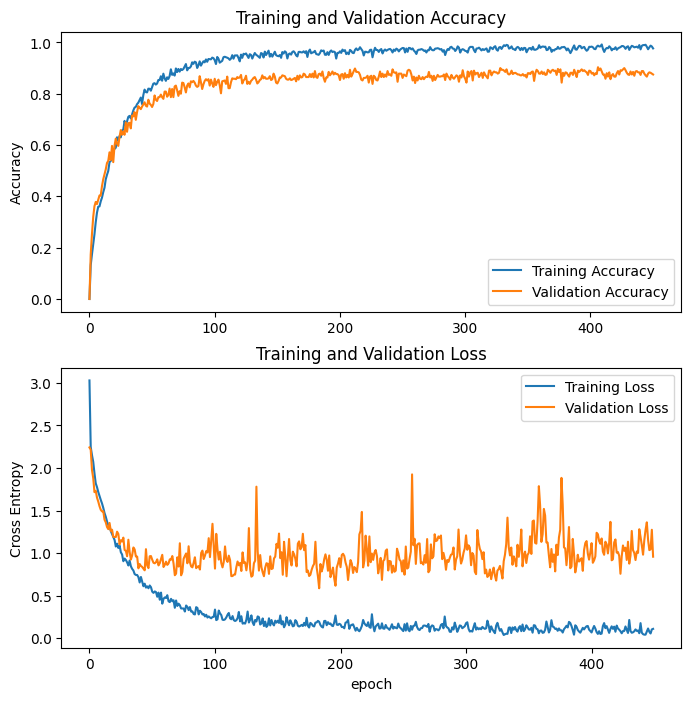

In [16]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()